In [1]:
from mixclu import *

In [2]:
df          = pd.read_csv('lbdm.csv')
df          = df.drop(['LBDTC', 'VISITNUM', 'LBDY', 'VISITDY', 'LBSTRESN'], axis = 1)

# cat_columns = ['SEX','RACE','LBTEST','ACTARM','ETHNIC', 'VISIT', 'COUNTRY', 'LBNRIND']
# con_columns = ['AGE']
# id_cols     = ['usubjid', 'SITEID', 'SUBJID']
# y           = ['LBNRIND']

id_col, cat_col, con_col = get_types(df)

In [ ]:
id_col, cat_col, con_col

total_columns..
LBTEST LBNRIND VISIT DTHDTC DTHFL SEX RACE ETHNIC ACTARM COUNTRY AGE
(4913, 11)
converting cat columns into object types..
 (4913, 11)
calculating missing values..
 (4913, 11)
Your selected dataframe has 11 columns.
total values 4913 There are 2 columns that have missing values.
        Missing Values  % of Total Values col_name
DTHFL             4871               99.1    DTHFL
DTHDTC            4871               99.1   DTHDTC


dropping columns -- DTHFL,DTHDTC -- Reason : Contains a lot NaN values
deleting columns -- COUNTRY -- Reason : Contain a Single Value
before duplicate size (4913, 8)
after duplicate removal (3565, 8)
imputing values.. (3565, 8)
encoding cat columns (3565, 8)
Final cat features LBTEST,LBNRIND,SEX,RACE,VISIT,ACTARM,ETHNIC
encoding..
LBTEST 7
encoding..
LBNRIND 4


/Users/monk/Desktop/MixClu/mixclu/preprocessing.py:157: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[col_name] = df[col_name].astype(object)


encoding..
SEX 2
encoding..
RACE 3
encoding..
VISIT 22
encoding..
ACTARM 3
encoding..
ETHNIC 2


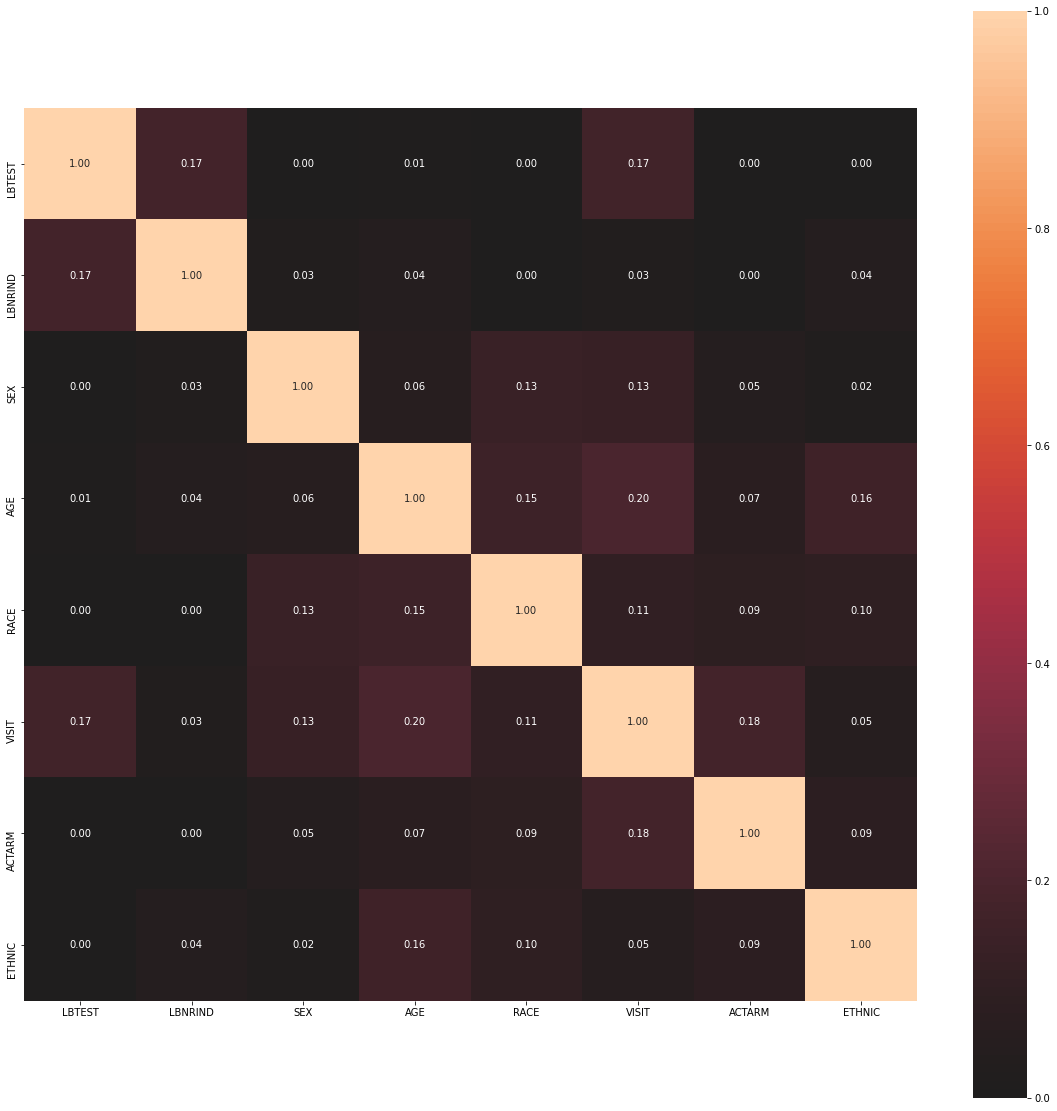

Final cat features LBTEST,LBNRIND,SEX,RACE,VISIT,ACTARM,ETHNIC


In [3]:
df_pre = autopreprocessing(df, 
                  cat_col, 
                  id_columns      = id_col,
                  con_colmns      = con_col,
                  y               = None, 
                  allowed_missing = 20.0, 
                  corr_thr        = None)

In [7]:
df_pre[1]

,LBTEST,LBNRIND,SEX,AGE,RACE,VISIT,ACTARM,ETHNIC,usubjid,SUBJID,SITEID
0,Color,NORMAL,F,63,WHITE,SCREENING 1,Placebo,HISPANIC OR LATINO,01-701-1015,1015,701
1,Color,NORMAL,F,63,WHITE,WEEK 2,Placebo,HISPANIC OR LATINO,01-701-1015,1015,701
2,Color,NORMAL,F,63,WHITE,WEEK 12,Placebo,HISPANIC OR LATINO,01-701-1015,1015,701
3,Color,NORMAL,F,63,WHITE,WEEK 24,Placebo,HISPANIC OR LATINO,01-701-1015,1015,701
4,Ketones,NORMAL,F,63,WHITE,SCREENING 1,Placebo,HISPANIC OR LATINO,01-701-1015,1015,701
...,...,...,...,...,...,...,...,...,...,...,...
4908,Thyrotropin,NORMAL,F,74,BLACK OR AFRICAN AMERICAN,SCREENING 1,Xanomeline High Dose,NOT HISPANIC OR LATINO,01-718-1427,1427,718
4909,Urobilinogen,NORMAL,F,74,BLACK OR AFRICAN AMERICAN,SCREENING 1,Xanomeline High Dose,NOT HISPANIC OR LATINO,01-718-1427,1427,718
4910,Urobilinogen,NORMAL,F,74,BLACK OR AFRICAN AMERICAN,WEEK 2,Xanomeline High Dose,NOT HISPANIC OR LATINO,01-718-1427,1427,718
4911,Urobilinogen,NORMAL,F,74,BLACK OR AFRICAN AMERICAN,UNSCHEDULED 8.2,Xanomeline High Dose,NOT HISPANIC OR LATINO,01-718-1427,1427,718


In [4]:
df_pre[0].info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3565 entries, 0 to 4912
Data columns (total 11 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   LBTEST   3565 non-null   object
 1   LBNRIND  3565 non-null   object
 2   SEX      3565 non-null   object
 3   AGE      3565 non-null   int64 
 4   RACE     3565 non-null   object
 5   VISIT    3565 non-null   object
 6   ACTARM   3565 non-null   object
 7   ETHNIC   3565 non-null   object
 8   usubjid  3565 non-null   object
 9   SUBJID   3565 non-null   int64 
 10  SITEID   3565 non-null   int64 
dtypes: int64(3), object(8)
memory usage: 334.2+ KB


In [ ]:
final_cat_col   = [col_name for col_name in df_pre[0].columns if col_name in cat_col]
print(f'Final cat features {",".join(final_cat_col)}')
df              = cobj(df, final_cat_col)

In [ ]:
get_types(df_pre[0])